# Amazon Sales Analysis

## Content
* Data Preparation and Cleaning
* Exploratory Data Analysis
* Conclusion

### Data Preparation and Cleaning
1. Importing Libraries
2. Loading Dataset
3. Data cleaning and preparation.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import combinations
from collections import Counter 

import os

#### Importing the Dataset

In [2]:
df = pd.read_csv('DataDNA Dataset Challenge - December 2022.csv')

In [3]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Data Cleaning and Preparation

In [4]:
df.isnull().sum()  # checking for missing values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

The Data is clean, with no missing values

In [5]:
df.head(-10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185671,259344,AAA Batteries (4-pack),2,2.99,09/10/2019 23:33,"721 Madison St, San Francisco, CA 94016"
185672,259345,ThinkPad Laptop,1,999.99,09/21/19 23:12,"406 Dogwood St, San Francisco, CA 94016"
185673,259346,Bose SoundSport Headphones,1,99.99,09/29/19 17:24,"484 Cedar St, New York City, NY 10001"
185674,259347,AA Batteries (4-pack),1,3.84,09/26/19 10:12,"979 Madison St, Los Angeles, CA 90001"


A copy of the dataset is created to protect the original dataset incase of future use

In [6]:
df_copy = df.copy() # creating a copy

In [7]:
df_copy

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185682,259354,iPhone,1,700.00,09/01/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
185683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
df_copy.info() # To check for the type of data in each column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [9]:
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


The 'Order Date' column is populated with object type data, also the date format is not consistent throughout the column. This can be corrected by converting the column to a datetime format as done below. 

In [10]:
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date']) # Converting to datetime format

In [11]:
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


The 'Order Date' column is now in datetime format, which makes it easier to call out the Month or Year when needed.

### Exploratory Data Analysis

1. What is the best year for sales? How much was earned that year?
2. What was the best month for sales? How much was earned that month?
3. What City had the highest number of sales?
4. What time should we display advertisement to maximize likelihood of customer's buying product?
5. What products are most often sold together?
6. What product sold the most? Why do you think it sold the most?


##### Question 1 : What is the best year for sales? How much was earned that year?

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


To do this I decided to add a year column to the dataframe

In [13]:
df_copy['Year'] = df_copy['Order Date'].dt.year 

df_copy.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",2019
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",2019
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",2019
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",2019
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",2019


A sales column is also added.

In [14]:
df_copy['Sales'] = df_copy['Quantity Ordered'] * df_copy['Price Each']

In [15]:
df_copy.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,11.99
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",2019,11.95
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",2019,99.99
7,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",2019,11.95
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",2019,1700.00
9,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",2019,11.99


In [16]:
year = df_copy.groupby('Year')['Sales'].sum()
year

Year
2019    34456867.65
2020        8670.29
Name: Sales, dtype: float64

The best year for sales is 2019. A total earning of 34,456,867 USD was made that year.

##### Question 2: What was the best month for sales? How much was earned that month?

Since there is no months column, A month column will be augmented to the dataset

In [17]:
df_copy['Month'] = df_copy['Order Date'].dt.month

df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,99.99,4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,600.00,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,11.99,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,11.99,4


In [18]:
monthly_sales = df_copy.groupby('Month')['Sales'].sum()

monthly_sales

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

In [19]:
results = df_copy.groupby('Month').sum()
results

,Order ID,Quantity Ordered,Price Each,Year,Sales
Month,,,,,
1,1420152202,10893,1810924.81,19582315,1821413.16
2,1868278508,13431,2186940.38,24141183,2200078.08
3,2560592045,16979,2789084.64,30543432,2804973.35
4,3383299164,20536,3366218.76,36860883,3389217.98
5,3343056791,18653,3133134.61,33418488,3150616.23
6,2928868159,15234,2560503.50,27327165,2576280.15
7,3280010744,16054,2631225.12,28821225,2646461.32
8,2894980432,13429,2226963.90,24112917,2241083.37
9,2944144303,13091,2081897.65,23426457,2094465.69


<function matplotlib.pyplot.show(close=None, block=None)>

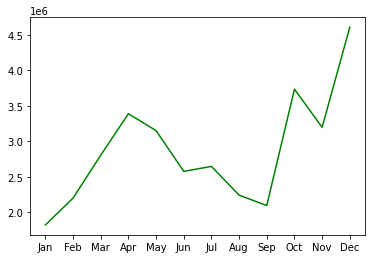

In [20]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, results['Sales'], color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

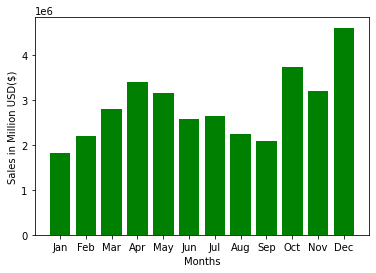

In [21]:
plt.bar(months, results['Sales'], color = 'green')
plt.xticks(months)
plt.ylabel('Sales in Million USD($)')
plt.xlabel('Months')
plt.show

From the charts above, it can be seen that December was the best month for sales with a total earnings of over 4 million USD (4608295.70 USD($))

##### Question 3: What City had the highest number of sales?

To augment a city column to the dataset, .apply() method will be used to pull out the cities from the Purchase Address.
Also, Since different states can have the same city name, the states will also be pull out.

In [22]:
# Use .apply()
def get_city(address):
    return address.split(',')[1]   # The city names are between commas

def get_state(address):
    return address.split(',')[2].split(' ')[1]  # The state names are between spaces


df_copy['City'] = df_copy['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 

df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,23.90,4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,99.99,4,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,600.00,4,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,11.99,4,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,11.99,4,Los Angeles (CA)


In [23]:
results = df_copy.groupby('City').sum()
results

,Order ID,Quantity Ordered,Price Each,Year,Sales,Month
City,,,,,,
Atlanta (GA),3419484721,16584,2778608.69,30008397,2794199.07,104649
Austin (TX),2277506240,11137,1808340.03,19967912,1818044.33,69720
Boston (MA),4590961337,22494,3634398.40,40180123,3658627.65,140898
Dallas (TX),3410206282,16707,2750026.38,29875145,2765373.96,104447
Los Angeles (CA),6801454376,33247,5417171.70,59689717,5448304.28,208020
New York City (NY),5729940452,27903,4632920.54,50166103,4661867.14,175557
Portland (ME),562382774,2746,446752.36,4948569,449321.38,17119
Portland (OR),2302544477,11291,1859836.44,20185964,1870010.56,70517
San Francisco (CA),10287205330,50169,8204001.38,90172590,8254743.55,314949


In [24]:
results.drop(columns = 'Month', inplace = True)
results

,Order ID,Quantity Ordered,Price Each,Year,Sales
City,,,,,
Atlanta (GA),3419484721,16584,2778608.69,30008397,2794199.07
Austin (TX),2277506240,11137,1808340.03,19967912,1818044.33
Boston (MA),4590961337,22494,3634398.40,40180123,3658627.65
Dallas (TX),3410206282,16707,2750026.38,29875145,2765373.96
Los Angeles (CA),6801454376,33247,5417171.70,59689717,5448304.28
New York City (NY),5729940452,27903,4632920.54,50166103,4661867.14
Portland (ME),562382774,2746,446752.36,4948569,449321.38
Portland (OR),2302544477,11291,1859836.44,20185964,1870010.56
San Francisco (CA),10287205330,50169,8204001.38,90172590,8254743.55


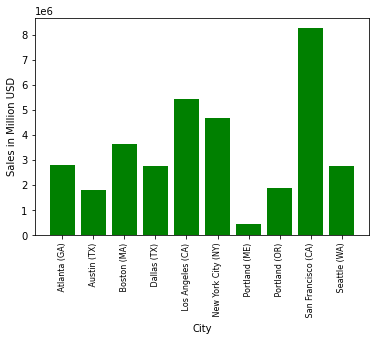

In [25]:
cities = [city for city, df in df_copy.groupby('City')]

plt.bar(cities, results['Sales'], color = 'green')
plt.xticks(cities, rotation ='vertical', size = 8)
plt.ylabel('Sales in Million USD')
plt.xlabel('City')
plt.show()

From the above chart, San Francisco(CA) recorded the highest number of sales.

##### Question 4: What time should we display advertisement to maximize likelihood of customer's buying product?

In [26]:
df_copy['Hour'] = df_copy['Order Date'].dt.hour
df_copy['Minute'] = df_copy['Order Date'].dt.minute
df_copy['Count'] = 1
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales,Month,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,23.90,4,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,99.99,4,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,600.00,4,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,11.99,4,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,11.99,4,Los Angeles (CA),9,27,1


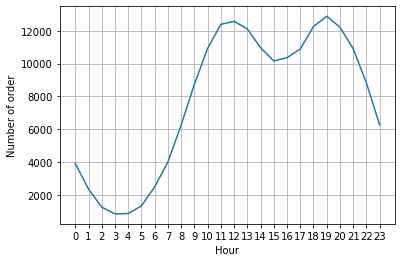

In [27]:
hours = [hour for hour, df in df_copy.groupby('Hour')]
plt.plot(hours, df_copy.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of order')
plt.grid()
plt.show()

From the above chart, My recommendations are between 11am to 12noon, and 7pm.

##### Question 5: What products are most often sold together?

A new dataframe is created and populated with the cells in the df_copy with duplicated Order ID

In [28]:
Grouped_df = df_copy[df_copy['Order ID'].duplicated(keep = False)]
Grouped_df['Grouped'] = Grouped_df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
Grouped_df = Grouped_df[['Order ID', 'Grouped']].drop_duplicates()

# Referenced from: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

C:\Users\GODIAN\AppData\Local\Temp\ipykernel_14684\1764974603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Grouped_df['Grouped'] = Grouped_df.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


In [29]:
Grouped_df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [30]:
# Referenced from: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in Grouped_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [31]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


iPhone and Lightning Charging Cable are the two items most commonly sold together.

##### Question 6: What product sold the most? Why do you think it sold the most?

In [32]:
products_quantity_ordered = df_copy.groupby('Product').sum()['Quantity Ordered']
products_quantity_ordered

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Quantity Ordered, dtype: int64

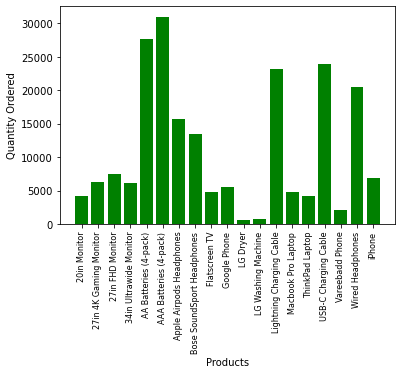

In [33]:
products = [product for product, df in df_copy.groupby('Product')]

plt.bar(products, products_quantity_ordered, color = 'g')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\GODIAN\AppData\Local\Temp\ipykernel_14684\1337533899.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


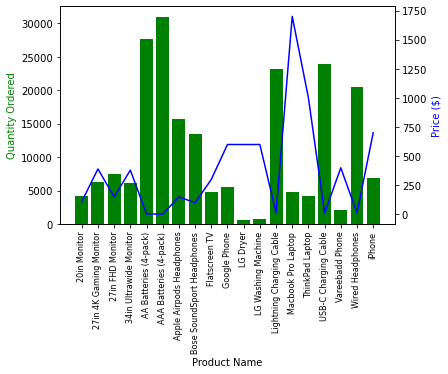

In [34]:
prices = df_copy.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, products_quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

AAA Batteries and AA Batteries are the most sold products. This maybe due to their low prices

### INSIGHTS

1. The best year for sales is 2019. A total earning of 34,456,867 USD was made that year.

2. A total revenue of 4,608,295.70 USD was made in December, making it the best month for sales.

3. San Francisco(CA) recorded the highest number of sales.

4. The recommended time for display of advertisement is between 11am to 12noon, and 7pm.

5. iPhone and Lightning Charging Cable are the two items most commonly sold together.

6. AAA Batteries and AA Batteries are the most sold products probably due to their low prices.

### For Dashboard

In [35]:
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Sales,Month,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,23.90,4,Dallas (TX),8,46,1
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,99.99,4,Boston (MA),22,30,1
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,600.00,4,Los Angeles (CA),14,38,1
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,11.99,4,Los Angeles (CA),14,38,1
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,11.99,4,Los Angeles (CA),9,27,1


In [36]:
df_copy.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Year                0
Sales               0
Month               0
City                0
Hour                0
Minute              0
Count               0
dtype: int64

In [37]:
df_copy.to_csv('df_copy.csv', index = False) # exporting clean data to csv

### Conclusion

This file was exported to Power BI where i developed the final dashboard.